In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from os import path
from time import time
from sklearn import manifold
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


/content/drive/MyDrive/Summer Research/Simulated CGM Data/adult#001.csv
circles, perplexity=5 in 3.9 sec
circles, perplexity=30 in 5.8 sec
circles, perplexity=50 in 6.8 sec
circles, perplexity=100 in 10 sec
/content/drive/MyDrive/Summer Research/Simulated CGM Data/adult#002.csv
circles, perplexity=5 in 4.1 sec
circles, perplexity=30 in 5.3 sec
circles, perplexity=50 in 6.4 sec
circles, perplexity=100 in 9.8 sec
/content/drive/MyDrive/Summer Research/Simulated CGM Data/adult#004.csv
circles, perplexity=5 in 3.9 sec
circles, perplexity=30 in 6.2 sec
circles, perplexity=50 in 6.9 sec
circles, perplexity=100 in 11 sec
/content/drive/MyDrive/Summer Research/Simulated CGM Data/adult#005.csv
circles, perplexity=5 in 3.9 sec
circles, perplexity=30 in 5.3 sec
circles, perplexity=50 in 6.7 sec
circles, perplexity=100 in 9.8 sec
/content/drive/MyDrive/Summer Research/Simulated CGM Data/adult#006.csv
circles, perplexity=5 in 3.9 sec
circles, perplexity=30 in 5.6 sec
circles, perplexity=50 in 7.1 s

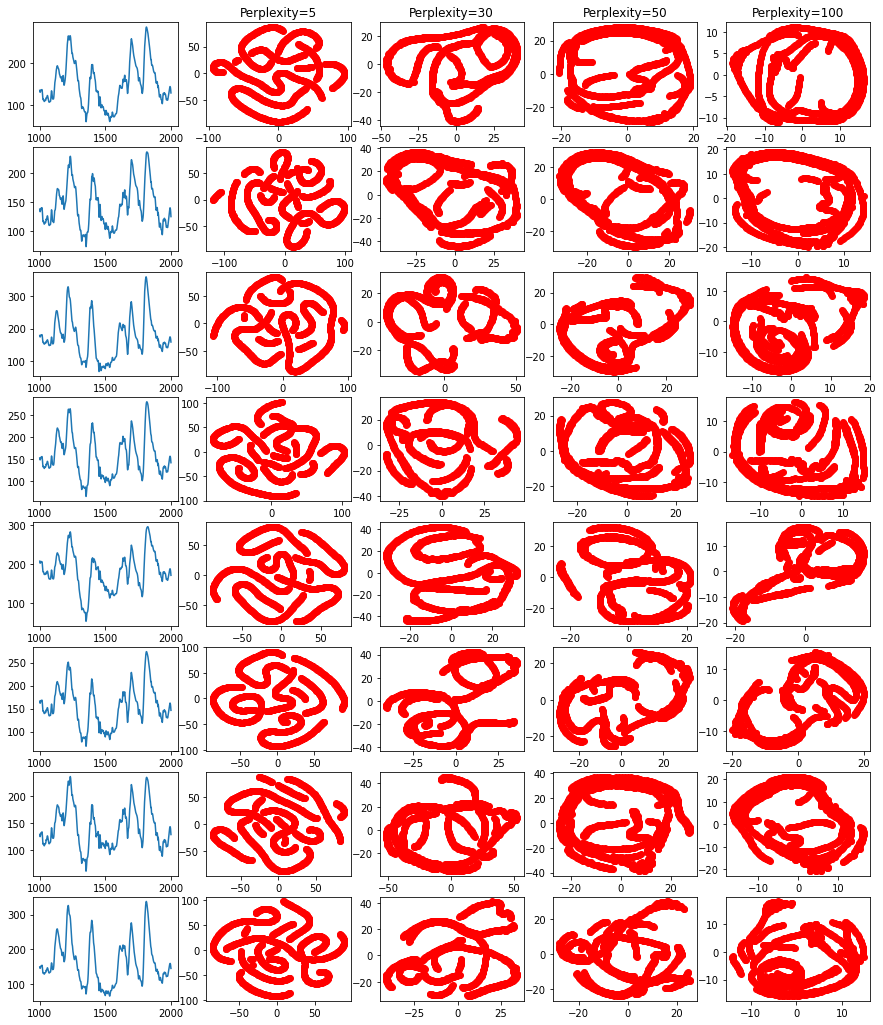

In [ ]:

(fig, subplots) = plt.subplots(8, 5, figsize=(15, 18))
perplexities = [5, 30, 50, 100]

k = 0;
for i in [1,2,4,5,6,7,8,10]:
  ivar = str(100000+i)
  ivar = ivar[3:] 
  fname1 = '/content/drive/MyDrive/Summer Research/Simulated CGM Data/adult#' + ivar + '.csv'

  print(fname1)
  x = pd.read_csv(fname1, delimiter=',')     #  x  = log(tbl.CGM);
  for t in range(1,100):
    x['CGM_L'+str(t)] = x['CGM'].shift(t)

  X = x.iloc[1000:2000,1:]
  X = X.to_numpy()

  if True:
    ax = subplots[k][0]
    ax.plot(x['CGM'][1000:2000])

  for j, perplexity in enumerate(perplexities):
    ax = subplots[k][j + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=2, init='random', random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.scatter(Y[0:,0], Y[0:,1], c="r")
    ax.axis('tight')
    if k==0:
      ax.set_title("Perplexity=%d" % perplexity)

  k += 1

plt.show()
